<a href="https://colab.research.google.com/github/JaredDRodriguez/Notebook_AI-Exercises_JDRC-1997259/blob/main/Pr%C3%A1ctica_2_LAB_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1: Traslación

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Paso 1: cargar imagen y verificar si se subio

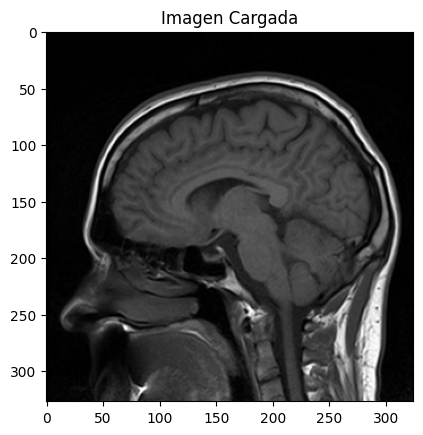

In [ ]:
# Cargar imagen médica
image= cv2.imread('/MR_BRAIN.png', cv2.IMREAD_GRAYSCALE)
# Verificar si la imagen se cargó correctamente
if image is None:
    print("Error: No se pudo cargar la imagen. Verifica la ruta y el nombre del archivo.")
else:
    plt.imshow(image, cmap='gray')
    plt.title("Imagen Cargada")
    plt.show()

Ejercicio 1: Traslación. Se traslada la imagen en una dirección dada rellenando los pixeles vacios con pixeles en negro. la traslación decimal se emplea apliacando tambien una interpolación

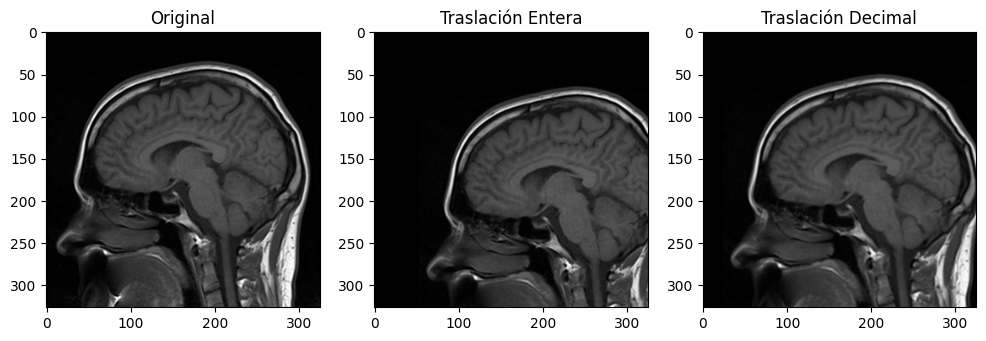

In [ ]:

# Ejercicio 1: Traslación
def translate_image(image, dx, dy):
    """Traslada una imagen en (dx, dy) píxeles."""
    rows, cols = image.shape
    M = np.float32([[1, 0, dx], [0, 1, dy]])
    translated_image = cv2.warpAffine(image, M, (cols, rows))
    return translated_image



# Traslación entera (50, 30)
translated_image_int = translate_image(image, 50, 30)

# Traslación decimal (20.5, 15.5)
translated_image_float = translate_image(image, 20.5, 15.5)

# Mostrar imágenes
plt.figure(figsize=(12, 4))
plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(132), plt.imshow(translated_image_int, cmap='gray'), plt.title('Traslación Entera')
plt.subplot(133), plt.imshow(translated_image_float, cmap='gray'), plt.title('Traslación Decimal')
plt.show()




Ejercicio 2: Rotación
Esta parte multiplica la imagen por una matriz de rotación para rotar la imagen en un angulo dado

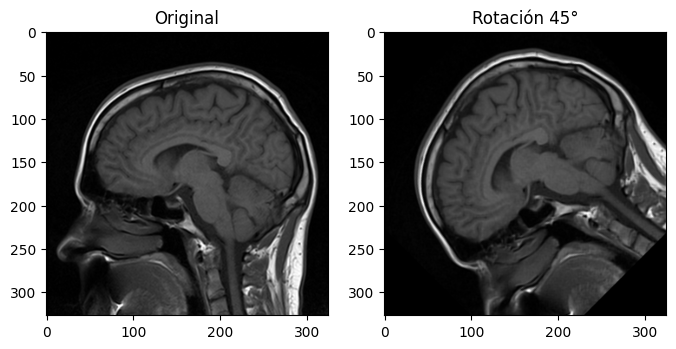

In [ ]:
# Ejercicio 2: Rotación
def rotate_image(image, angle):
    """Rota una imagen en 'angle' grados."""
    rows, cols = image.shape
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, M, (cols, rows))
    return rotated_image

# Rotación de 45 grados
rotated_image = rotate_image(image, 45)

# Mostrar imágenes
plt.figure(figsize=(8, 4))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(rotated_image, cmap='gray'), plt.title('Rotación 45°')
plt.show()



Ejercicio 3: Escala
Se amplia o reduce la imagen para añadir o quitarle pixeles a la imagen para cambiar su resolución manteniendo la relación de a x h

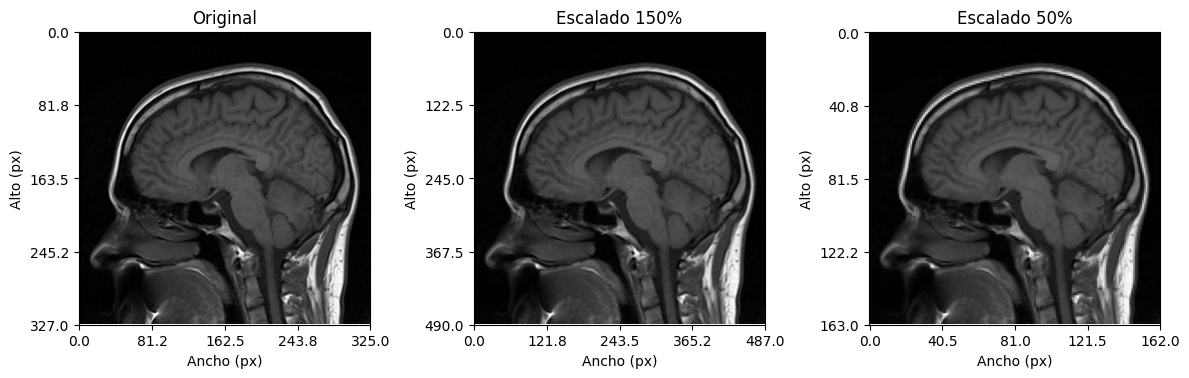

In [ ]:
# Ejercicio 3: Escala
def scale_image(image, scale_factor):
    """Escala una imagen por un factor."""
    rows, cols = image.shape
    new_rows, new_cols = int(rows * scale_factor), int(cols * scale_factor)
    scaled_image = cv2.resize(image, (new_cols, new_rows), interpolation=cv2.INTER_LINEAR)
    return scaled_image

# Escalado al 150%
scaled_image_150 = scale_image(image, 1.5)

# Escalado al 50%
scaled_image_50 = scale_image(image, 0.5)

# Mostrar imágenes con escala
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.xticks(np.linspace(0, image.shape[1], 5))
plt.yticks(np.linspace(0, image.shape[0], 5))
plt.xlabel("Ancho (px)")
plt.ylabel("Alto (px)")

plt.subplot(132)
plt.imshow(scaled_image_150, cmap='gray')
plt.title('Escalado 150%')
plt.xticks(np.linspace(0, scaled_image_150.shape[1], 5))
plt.yticks(np.linspace(0, scaled_image_150.shape[0], 5))
plt.xlabel("Ancho (px)")
plt.ylabel("Alto (px)")

plt.subplot(133)
plt.imshow(scaled_image_50, cmap='gray')
plt.title('Escalado 50%')
plt.xticks(np.linspace(0, scaled_image_50.shape[1], 5))
plt.yticks(np.linspace(0, scaled_image_50.shape[0], 5))
plt.xlabel("Ancho (px)")
plt.ylabel("Alto (px)")

plt.tight_layout()
plt.show()


# Parte II.- Ecualización de histograma

## 1. Cargar una imagen médica con bajo contraste.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
imagen = cv2.imread('/Tac parte 2.0.png', cv2.IMREAD_GRAYSCALE)

# Verificar que la imagen se haya cargado correctamente
if imagen is None:
    print("Error: No se pudo cargar la imagen.")
    exit()

## 2. Obtener y visualizar el histograma de la imagen original.

Text(0, 0.5, 'Frecuencia')

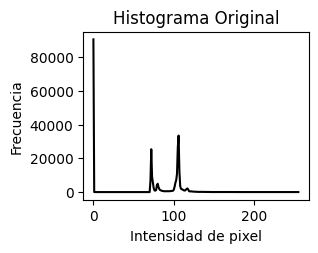

In [ ]:
# Obtener el histograma de la imagen ecualizada
hist_original = cv2.calcHist([imagen], [0], None, [256], [0,256])
#  Histograma de la imagen original
plt.subplot(2,2,2)
plt.plot(hist_original, color='black')
plt.title('Histograma Original')
plt.xlabel('Intensidad de pixel')
plt.ylabel('Frecuencia')


## 3. Aplicar ecualización de histograma para mejorar el contraste.

Text(0, 0.5, 'Frecuencia')

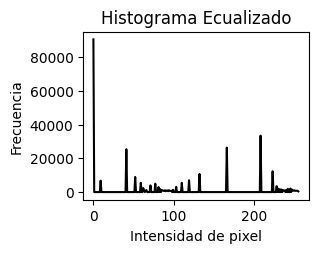

In [ ]:
# Aplicar la ecualización de histograma
imagen_ecualizada = cv2.equalizeHist(imagen)

# Obtener el histograma de la imagen ecualizada
hist_ecualizada = cv2.calcHist([imagen_ecualizada], [0], None, [256], [0,256])

# Histograma de la imagen ecualizada
plt.subplot(2,2,4)
plt.plot(hist_ecualizada, color='black')
plt.title('Histograma Ecualizado')
plt.xlabel('Intensidad de pixel')
plt.ylabel('Frecuencia')

## 4. Mostrar la imagen original, la imagen mejorada y comparar los histogramas.

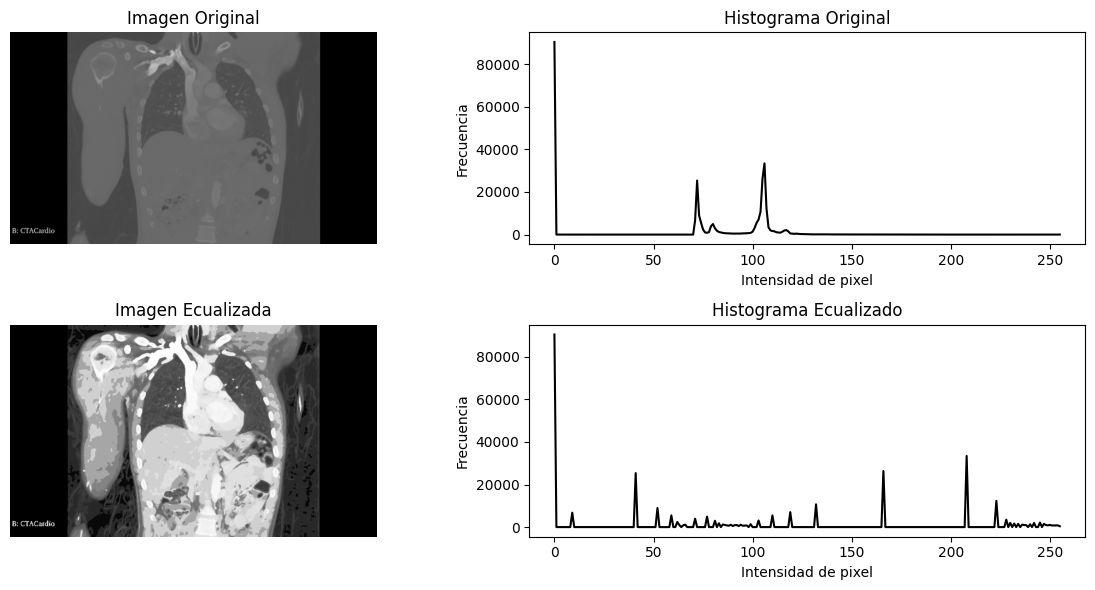

In [ ]:
# Mostrar la imagen original, la imagen mejorada y comparar los histogramas
plt.figure(figsize=(12,6))

# Imagen original
plt.subplot(2,2,1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

# Histograma de la imagen original
plt.subplot(2,2,2)
plt.plot(hist_original, color='black')
plt.title('Histograma Original')
plt.xlabel('Intensidad de pixel')
plt.ylabel('Frecuencia')

# Imagen ecualizada
plt.subplot(2,2,3)
plt.imshow(imagen_ecualizada, cmap='gray')
plt.title('Imagen Ecualizada')
plt.axis('off')

# Histograma de la imagen ecualizada
plt.subplot(2,2,4)
plt.plot(hist_ecualizada, color='black')
plt.title('Histograma Ecualizado')
plt.xlabel('Intensidad de pixel')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()